## 전체 코드와 시각화

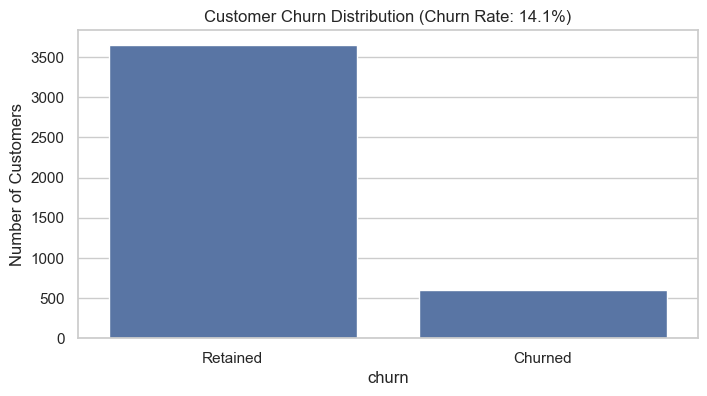

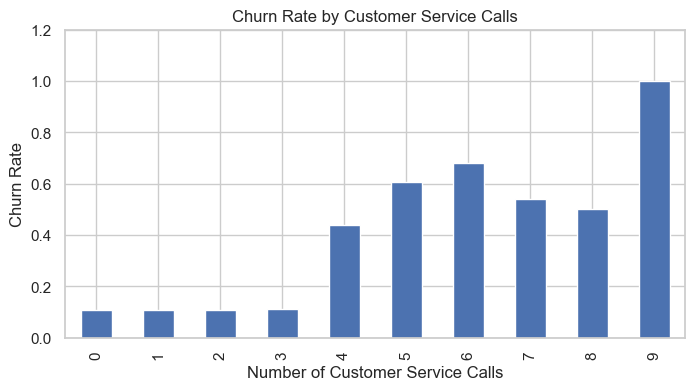

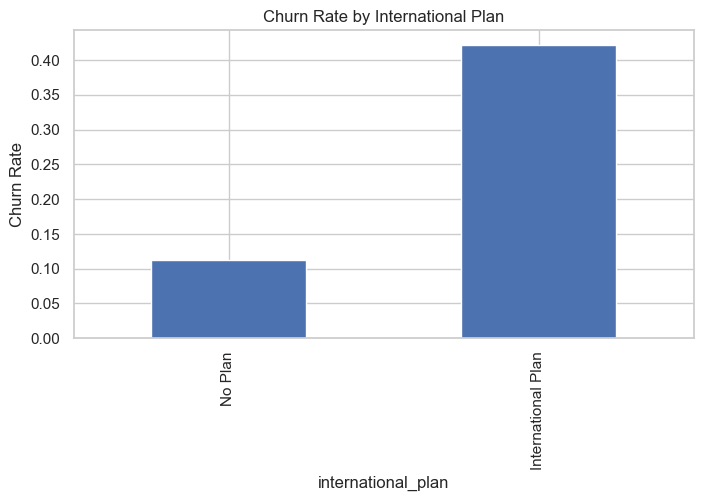

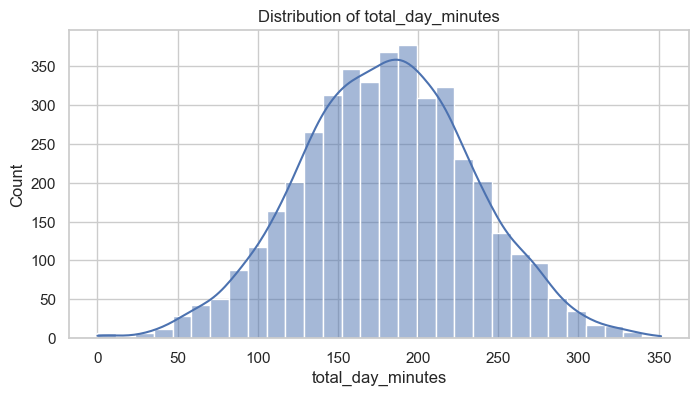

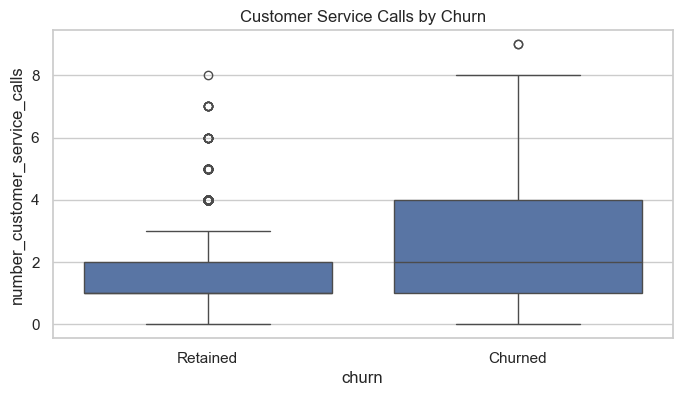

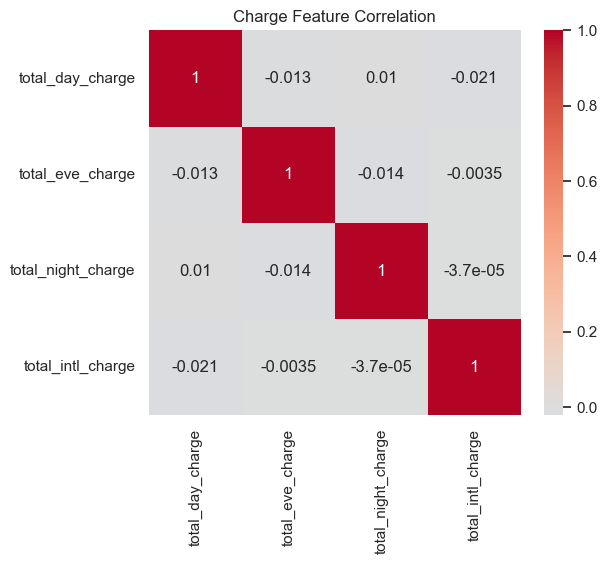

In [14]:
# 📊 Presentation-ready Visualizations for Telecom Churn Analysis
# 각 시각화는 '발표용 설명'에 최적화되어 있으며, 개별 실행이 가능합니다.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8, 4)

# 데이터 로드
def load_data(path="../../data/01_raw/train.csv"):
    df = pd.read_csv(path)
    if df['churn'].dtype == object:
        df['churn'] = df['churn'].map({'yes': 1, 'no': 0})
    return df

# --------------------------------------------------
# 1️⃣ 전체 고객 이탈 분포 (문제 제기용)
# --------------------------------------------------
def plot_churn_distribution(df):
    churn_rate = df['churn'].mean() * 100

    plt.figure()
    sns.countplot(x='churn', data=df)
    plt.title(f"Customer Churn Distribution (Churn Rate: {churn_rate:.1f}%)")
    plt.xticks([0, 1], ['Retained', 'Churned'])
    plt.ylabel("Number of Customers")
    plt.show()

# 발표 포인트:
# - 이탈 고객은 소수지만, 영향은 크다

# --------------------------------------------------
# 2️⃣ 고객센터 문의 횟수 vs 이탈률 (핵심 인사이트)
# --------------------------------------------------
def plot_cs_calls_vs_churn(df):
    cs_churn = df.groupby('number_customer_service_calls')['churn'].mean()

    plt.figure()
    cs_churn.plot(kind='bar')
    plt.title("Churn Rate by Customer Service Calls")
    plt.xlabel("Number of Customer Service Calls")
    plt.ylabel("Churn Rate")
    plt.ylim(0, cs_churn.max() * 1.2)
    plt.show()

# 발표 포인트:
# - 3~4회 이상부터 이탈률이 급격히 상승
# - 이탈 직전 신호로 활용 가능

# --------------------------------------------------
# 3️⃣ 국제전화 요금제 가입 여부에 따른 이탈률
# --------------------------------------------------
def plot_international_plan_churn(df):
    intl_churn = df.groupby('international_plan')['churn'].mean()

    plt.figure()
    intl_churn.plot(kind='bar')
    plt.title("Churn Rate by International Plan")
    plt.xticks([0, 1], ['No Plan', 'International Plan'])
    plt.ylabel("Churn Rate")
    plt.show()

# 발표 포인트:
# - 국제전화 고객은 가격 민감 고객군
# - 요금제 개선의 명확한 타겟

# --------------------------------------------------
# 4️⃣ 주요 사용량 변수 분포 (고사용자 강조)
# --------------------------------------------------
def plot_usage_distribution(df, column):
    plt.figure()
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

# 발표 포인트:
# - 소수의 고사용자가 매출과 이탈에 큰 영향

# --------------------------------------------------
# 5️⃣ Churn vs 고객센터 문의 횟수 (Boxplot)
# --------------------------------------------------
def plot_box_cs_calls(df):
    plt.figure()
    sns.boxplot(x='churn', y='number_customer_service_calls', data=df)
    plt.title("Customer Service Calls by Churn")
    plt.xticks([0, 1], ['Retained', 'Churned'])
    plt.show()

# 발표 포인트:
# - 이탈 고객의 중앙값이 명확히 높음

# --------------------------------------------------
# 6️⃣ 요금 변수 상관관계 (신뢰도 확보용)
# --------------------------------------------------
def plot_charge_correlation(df):
    charge_cols = [c for c in df.columns if 'charge' in c]
    corr = df[charge_cols].corr()

    plt.figure(figsize=(6, 5))
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
    plt.title("Charge Feature Correlation")
    plt.show()

# 발표 포인트:
# - 요금 변수 간 강한 상관관계
# - 트리 기반 모델 선택의 근거

# --------------------------------------------------
# 7️⃣ 전략 시뮬레이션 효과 (Before vs After)
# --------------------------------------------------
def plot_simulation_effect(before_churn, after_churn):
    labels = ['Before (AS-IS)', 'After (TO-BE)']
    values = [before_churn, after_churn]

    plt.figure()
    bars = plt.bar(labels, values)
    plt.ylabel('Churn Rate (%)')
    plt.title('Effect of Retention Strategy Simulation')
    plt.ylim(0, max(values) * 1.3)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
                 f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')
    plt.show()

# 발표 포인트:
# - 전략 적용 시 이탈률이 실제로 얼마나 줄어드는지 직관적으로 전달

# --------------------------------------------------
# 8️⃣ 기대 효과: 연간 매출 회복 비교
# --------------------------------------------------
def plot_expected_revenue_effect(current_loss, projected_loss):
    labels = ['Current Loss', 'Projected Loss']
    values = [current_loss, projected_loss]

    plt.figure()
    bars = plt.barh(labels, values)
    plt.xlabel('Annual Revenue Loss')
    plt.title('Expected Revenue Recovery (Yearly)')

    for bar in bars:
        width = bar.get_width()
        plt.text(width * 1.01, bar.get_y() + bar.get_height()/2,
                 f'${width:,.0f}', va='center', fontweight='bold')
    plt.show()

# 발표 포인트:
# - 이탈률 감소가 실제 돈으로 얼마나 의미 있는지 강조

# --------------------------------------------------
# 9️⃣ 최종 결론 시각화 (메시지 전달용)
# --------------------------------------------------
def plot_final_message():
    plt.figure(figsize=(8, 3))
    plt.text(0.5, 0.6, 'Customer Churn is NOT Random', ha='center', va='center', fontsize=18, fontweight='bold')
    plt.text(0.5, 0.4, '→ It is Predictable and Manageable', ha='center', va='center', fontsize=14)
    plt.axis('off')
    plt.title('Final Conclusion')
    plt.show()

# 발표 포인트:
# - 기술보다 메시지 중심
# - 경영진/비개발자에게 강한 인상

# --------------------------------------------------
# 실행 예시
# --------------------------------------------------
if __name__ == "__main__":
    df = load_data()

    plot_churn_distribution(df)
    plot_cs_calls_vs_churn(df)
    plot_international_plan_churn(df)
    plot_usage_distribution(df, 'total_day_minutes')
    plot_box_cs_calls(df)
    plot_charge_correlation(df)


1️⃣ 문제 제기

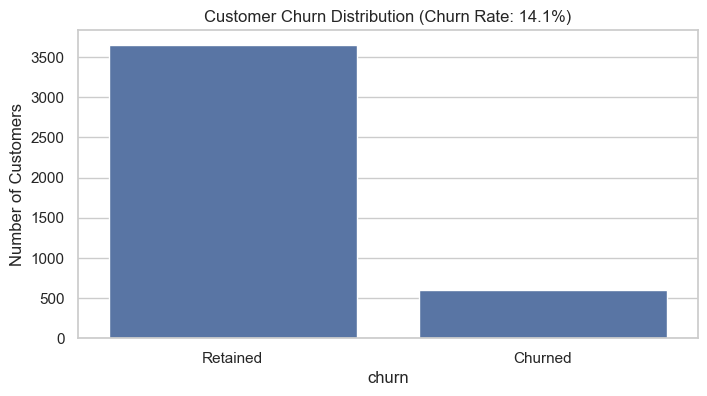

In [9]:
plot_churn_distribution(df)

2️⃣ 핵심 원인 ① 고객센터

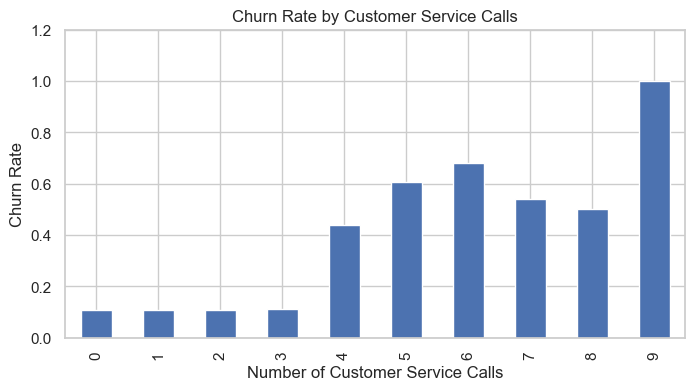

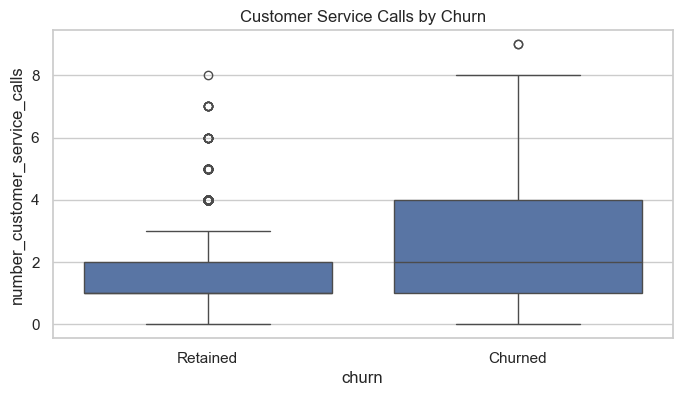

In [10]:
plot_cs_calls_vs_churn(df)
plot_box_cs_calls(df)


3️⃣ 핵심 원인 ② 국제전화

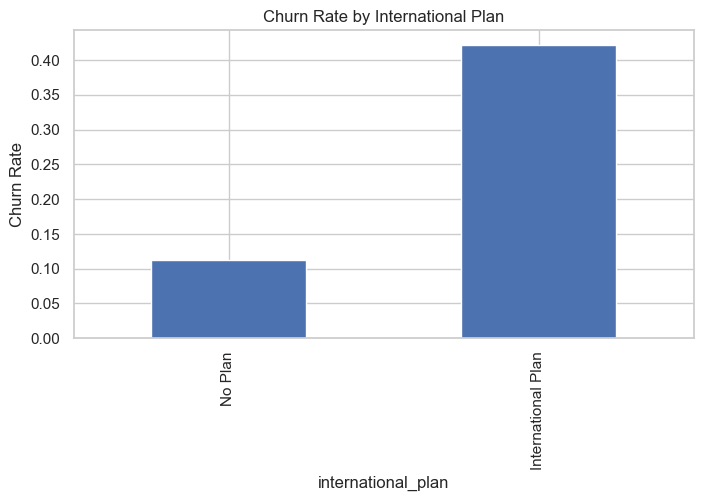

In [11]:
plot_international_plan_churn(df)


4️⃣ 보조 설명 (신뢰도 강화)

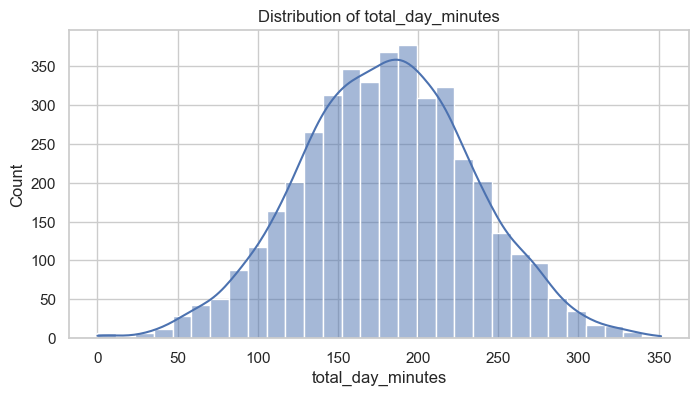

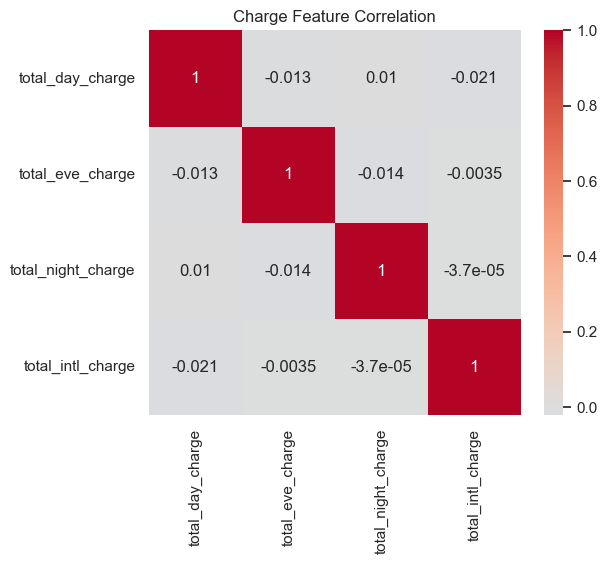

In [12]:
plot_usage_distribution(df, 'total_day_minutes')
plot_charge_correlation(df)


# 전화 사용량에 따른 이탈률

C:\Users\Playdata\AppData\Local\Temp\ipykernel_21704\1858549066.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('usage_bin')['churn']
C:\Users\Playdata\AppData\Local\Temp\ipykernel_21704\1858549066.py:76: UserWarning: Glyph 128222 (\N{TELEPHONE RECEIVER}) missing from font(s) Gulim.
  plt.tight_layout()
c:\Users\Playdata\miniconda3\envs\second_project_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128222 (\N{TELEPHONE RECEIVER}) missing from font(s) Gulim.
  fig.canvas.print_figure(bytes_io, **kw)


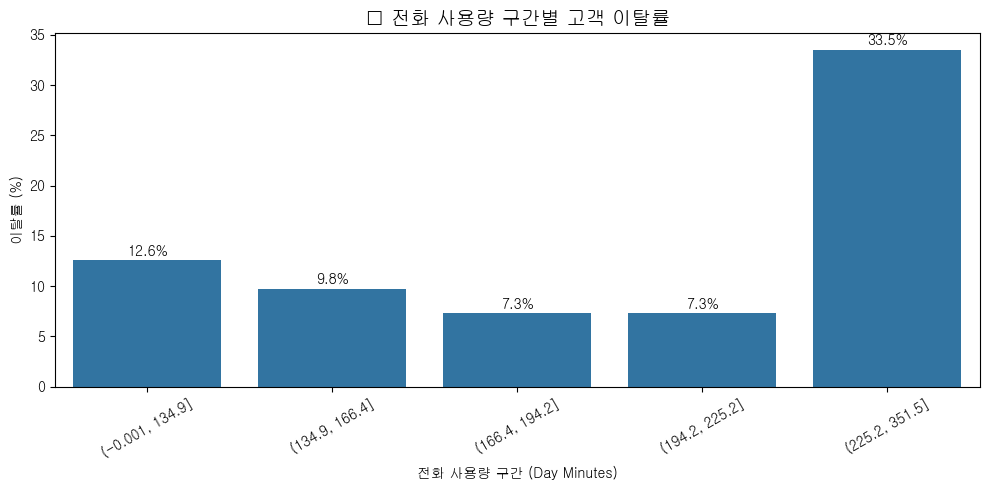

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글폰트 사용을 위한 설정(Window)
import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
# matplotlib.rc 또는 plt.rc 모두 가능
matplotlib.rc('font', family=font_name)

# -----------------------------
# 1. 데이터 로드
# -----------------------------
DATA_PATH = "data/01_raw/train.csv"  # 경로 맞게 수정

df = pd.read_csv(DATA_PATH)

# -----------------------------
# 2. 전처리
# -----------------------------
# churn: yes/no → 1/0
if df['churn'].dtype == object:
    df['churn'] = df['churn'].map({'yes': 1, 'no': 0})

# 분석할 전화 사용량 컬럼 선택
# (낮 통화 기준, 필요하면 eve / night / intl 도 가능)
usage_col = 'total_day_minutes'

# -----------------------------
# 3. 전화 사용량 구간 나누기
# -----------------------------
# 분위수 기준으로 5개 구간 생성
df['usage_bin'] = pd.qcut(
    df[usage_col],
    q=5,
    duplicates='drop'
)

# -----------------------------
# 4. 구간별 이탈률 계산
# -----------------------------
churn_rate_by_usage = (
    df
    .groupby('usage_bin')['churn']
    .mean()
    .reset_index()
)

churn_rate_by_usage['churn_rate'] = churn_rate_by_usage['churn'] * 100

# -----------------------------
# 5. 시각화
# -----------------------------
plt.figure(figsize=(10, 5))

sns.barplot(
    data=churn_rate_by_usage,
    x='usage_bin',
    y='churn_rate'
)

plt.title("📞 전화 사용량 구간별 고객 이탈률", fontsize=14)
plt.xlabel("전화 사용량 구간 (Day Minutes)")
plt.ylabel("이탈률 (%)")
plt.xticks(rotation=30)

# 수치 표시
for i, rate in enumerate(churn_rate_by_usage['churn_rate']):
    plt.text(i, rate + 0.5, f"{rate:.1f}%", ha='center')

plt.tight_layout()
plt.show()


C:\Users\Playdata\AppData\Local\Temp\ipykernel_21704\1791043026.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['charge_group', 'cs_group', 'usage_mid'])['churn']
C:\Users\Playdata\AppData\Local\Temp\ipykernel_21704\1791043026.py:82: UserWarning: Glyph 128222 (\N{TELEPHONE RECEIVER}) missing from font(s) Gulim.
  plt.tight_layout()
c:\Users\Playdata\miniconda3\envs\second_project_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128222 (\N{TELEPHONE RECEIVER}) missing from font(s) Gulim.
  fig.canvas.print_figure(bytes_io, **kw)


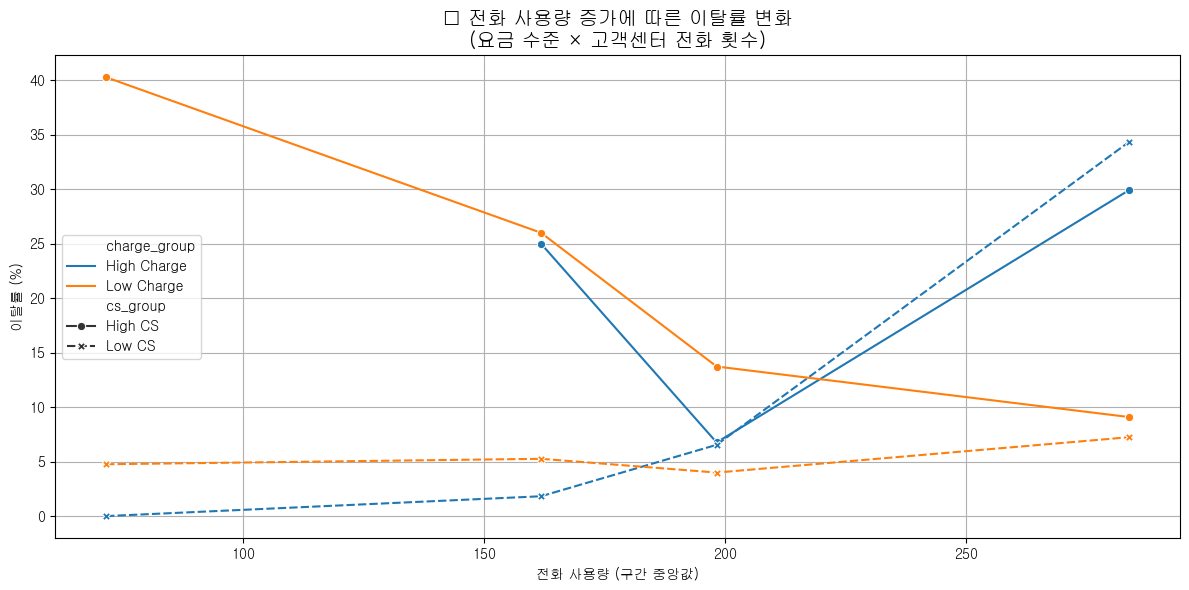

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------
# 1. 데이터 로드
# --------------------------------
DATA_PATH = "data/01_raw/train.csv"
df = pd.read_csv(DATA_PATH)

# --------------------------------
# 2. 전처리
# --------------------------------
if df['churn'].dtype == object:
    df['churn'] = df['churn'].map({'yes': 1, 'no': 0})

# 총 요금
charge_cols = [
    'total_day_charge',
    'total_eve_charge',
    'total_night_charge',
    'total_intl_charge'
]
df['total_charge'] = df[charge_cols].sum(axis=1)

usage_col = 'total_day_minutes'

# --------------------------------
# 3. 그룹 정의
# --------------------------------
# 요금 그룹
charge_threshold = df['total_charge'].quantile(0.7)
df['charge_group'] = np.where(
    df['total_charge'] >= charge_threshold,
    'High Charge',
    'Low Charge'
)

# 고객센터 그룹
df['cs_group'] = np.where(
    df['number_customer_service_calls'] >= 3,
    'High CS',
    'Low CS'
)

# 전화 사용량 구간
df['usage_bin'] = pd.qcut(df[usage_col], q=4, duplicates='drop')

# 🔥 핵심 수정: 구간 중앙값을 숫자로 변환
df['usage_mid'] = df['usage_bin'].apply(lambda x: x.mid)

# --------------------------------
# 4. 이탈률 계산
# --------------------------------
summary = (
    df.groupby(['charge_group', 'cs_group', 'usage_mid'])['churn']
    .mean()
    .reset_index()
)

summary['churn_rate'] = summary['churn'] * 100

# --------------------------------
# 5. 시각화 (정상 작동)
# --------------------------------
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=summary,
    x='usage_mid',
    y='churn_rate',
    hue='charge_group',
    style='cs_group',
    markers=True
)

plt.title("📞 전화 사용량 증가에 따른 이탈률 변화\n(요금 수준 × 고객센터 전화 횟수)", fontsize=14)
plt.xlabel("전화 사용량 (구간 중앙값)")
plt.ylabel("이탈률 (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


## 전화 사용량 × 고객센터 횟수 × 이탈률

C:\Users\Playdata\AppData\Local\Temp\ipykernel_21704\140579741.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['cs_group', 'usage_mid'])['churn']
C:\Users\Playdata\AppData\Local\Temp\ipykernel_21704\140579741.py:59: UserWarning: Glyph 128222 (\N{TELEPHONE RECEIVER}) missing from font(s) Gulim.
  plt.tight_layout()
c:\Users\Playdata\miniconda3\envs\second_project_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128222 (\N{TELEPHONE RECEIVER}) missing from font(s) Gulim.
  fig.canvas.print_figure(bytes_io, **kw)


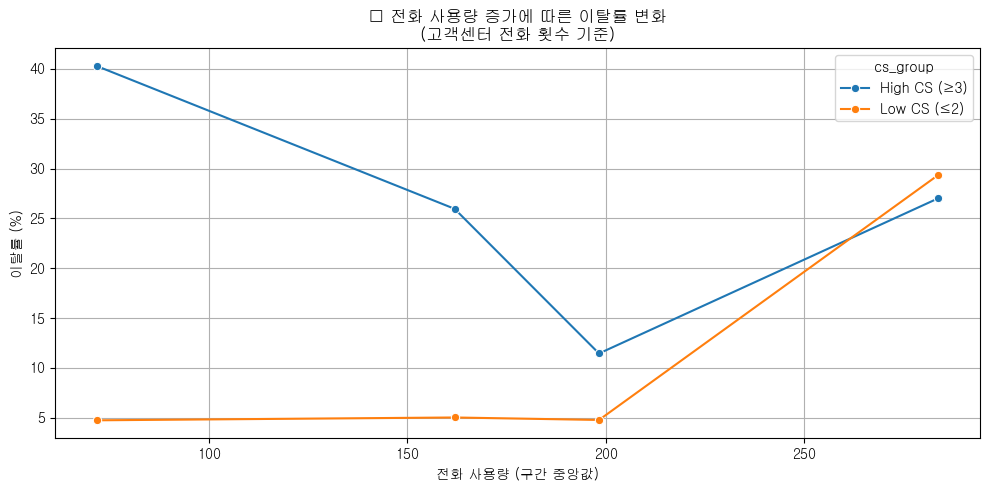

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. 데이터 로드
# -----------------------------
DATA_PATH = "data/01_raw/train.csv"
df = pd.read_csv(DATA_PATH)

# -----------------------------
# 2. 전처리
# -----------------------------
# churn yes/no → 1/0
if df['churn'].dtype == object:
    df['churn'] = df['churn'].map({'yes': 1, 'no': 0})

usage_col = 'total_day_minutes'

# 고객센터 그룹
df['cs_group'] = np.where(
    df['number_customer_service_calls'] >= 3,
    'High CS (≥3)',
    'Low CS (≤2)'
)

# 전화 사용량 구간
df['usage_bin'] = pd.qcut(df[usage_col], q=4, duplicates='drop')
df['usage_mid'] = df['usage_bin'].apply(lambda x: x.mid)

# -----------------------------
# 3. 이탈률 계산
# -----------------------------
summary_cs = (
    df.groupby(['cs_group', 'usage_mid'])['churn']
    .mean()
    .reset_index()
)
summary_cs['churn_rate'] = summary_cs['churn'] * 100

# -----------------------------
# 4. 시각화
# -----------------------------
plt.figure(figsize=(10, 5))

sns.lineplot(
    data=summary_cs,
    x='usage_mid',
    y='churn_rate',
    hue='cs_group',
    marker='o'
)

plt.title("📞 전화 사용량 증가에 따른 이탈률 변화\n(고객센터 전화 횟수 기준)")
plt.xlabel("전화 사용량 (구간 중앙값)")
plt.ylabel("이탈률 (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


## 전화 사용량 × 요금 수준 × 이탈률

C:\Users\Playdata\AppData\Local\Temp\ipykernel_21704\2534805280.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['charge_group', 'usage_mid'])['churn']
C:\Users\Playdata\AppData\Local\Temp\ipykernel_21704\2534805280.py:47: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Gulim.
  plt.tight_layout()
c:\Users\Playdata\miniconda3\envs\second_project_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Gulim.
  fig.canvas.print_figure(bytes_io, **kw)


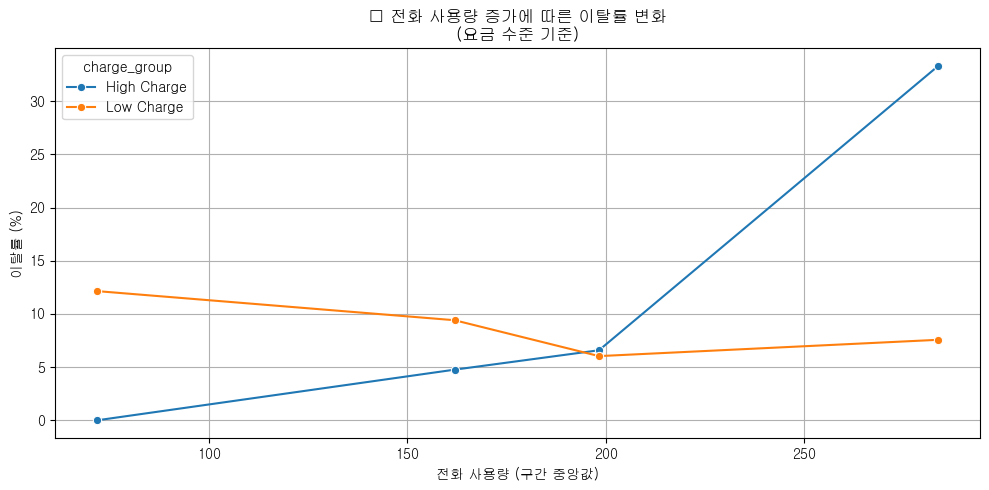

In [9]:
# -----------------------------
# 1. 요금 전처리
# -----------------------------
charge_cols = [
    'total_day_charge',
    'total_eve_charge',
    'total_night_charge',
    'total_intl_charge'
]
df['total_charge'] = df[charge_cols].sum(axis=1)

# 요금 그룹 (상위 30% = High Charge)
charge_threshold = df['total_charge'].quantile(0.7)
df['charge_group'] = np.where(
    df['total_charge'] >= charge_threshold,
    'High Charge',
    'Low Charge'
)

# -----------------------------
# 2. 이탈률 계산
# -----------------------------
summary_charge = (
    df.groupby(['charge_group', 'usage_mid'])['churn']
    .mean()
    .reset_index()
)
summary_charge['churn_rate'] = summary_charge['churn'] * 100

# -----------------------------
# 3. 시각화
# -----------------------------
plt.figure(figsize=(10, 5))

sns.lineplot(
    data=summary_charge,
    x='usage_mid',
    y='churn_rate',
    hue='charge_group',
    marker='o'
)

plt.title("💰 전화 사용량 증가에 따른 이탈률 변화\n(요금 수준 기준)")
plt.xlabel("전화 사용량 (구간 중앙값)")
plt.ylabel("이탈률 (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Playdata\AppData\Local\Temp\ipykernel_21704\2133564363.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('usage_mid')


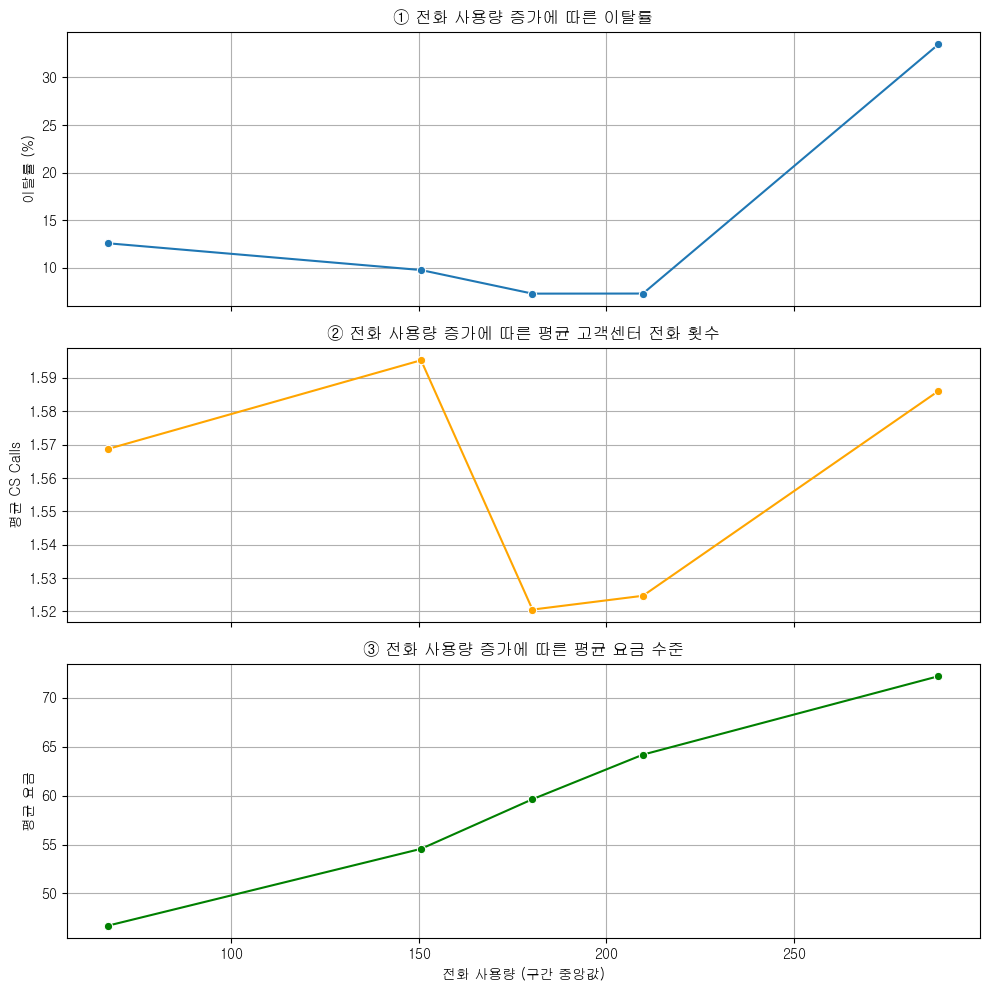

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. 데이터 로드
# -----------------------------
DATA_PATH = "data/01_raw/train.csv"
df = pd.read_csv(DATA_PATH)

# -----------------------------
# 2. 전처리
# -----------------------------
# churn yes/no → 1/0
if df['churn'].dtype == object:
    df['churn'] = df['churn'].map({'yes': 1, 'no': 0})

# 총 요금
charge_cols = [
    'total_day_charge',
    'total_eve_charge',
    'total_night_charge',
    'total_intl_charge'
]
df['total_charge'] = df[charge_cols].sum(axis=1)

usage_col = 'total_day_minutes'

# -----------------------------
# 3. 전화 사용량 구간화
# -----------------------------
df['usage_bin'] = pd.qcut(df[usage_col], q=5, duplicates='drop')
df['usage_mid'] = df['usage_bin'].apply(lambda x: x.mid)

# -----------------------------
# 4. 구간별 지표 계산
# -----------------------------
summary = (
    df.groupby('usage_mid')
      .agg(
          churn_rate=('churn', 'mean'),
          avg_cs_calls=('number_customer_service_calls', 'mean'),
          avg_charge=('total_charge', 'mean')
      )
      .reset_index()
)

summary['churn_rate'] *= 100

# -----------------------------
# 5. 시각화 (원인 분해 핵심)
# -----------------------------
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# (1) 이탈률
sns.lineplot(
    data=summary,
    x='usage_mid',
    y='churn_rate',
    marker='o',
    ax=axes[0]
)
axes[0].set_title("① 전화 사용량 증가에 따른 이탈률")
axes[0].set_ylabel("이탈률 (%)")
axes[0].grid(True)

# (2) 고객센터 전화 횟수
sns.lineplot(
    data=summary,
    x='usage_mid',
    y='avg_cs_calls',
    marker='o',
    ax=axes[1],
    color='orange'
)
axes[1].set_title("② 전화 사용량 증가에 따른 평균 고객센터 전화 횟수")
axes[1].set_ylabel("평균 CS Calls")
axes[1].grid(True)

# (3) 요금 수준
sns.lineplot(
    data=summary,
    x='usage_mid',
    y='avg_charge',
    marker='o',
    ax=axes[2],
    color='green'
)
axes[2].set_title("③ 전화 사용량 증가에 따른 평균 요금 수준")
axes[2].set_ylabel("평균 요금")
axes[2].set_xlabel("전화 사용량 (구간 중앙값)")
axes[2].grid(True)

plt.tight_layout()
plt.show()


C:\Users\Playdata\AppData\Local\Temp\ipykernel_21704\709291015.py:34: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(


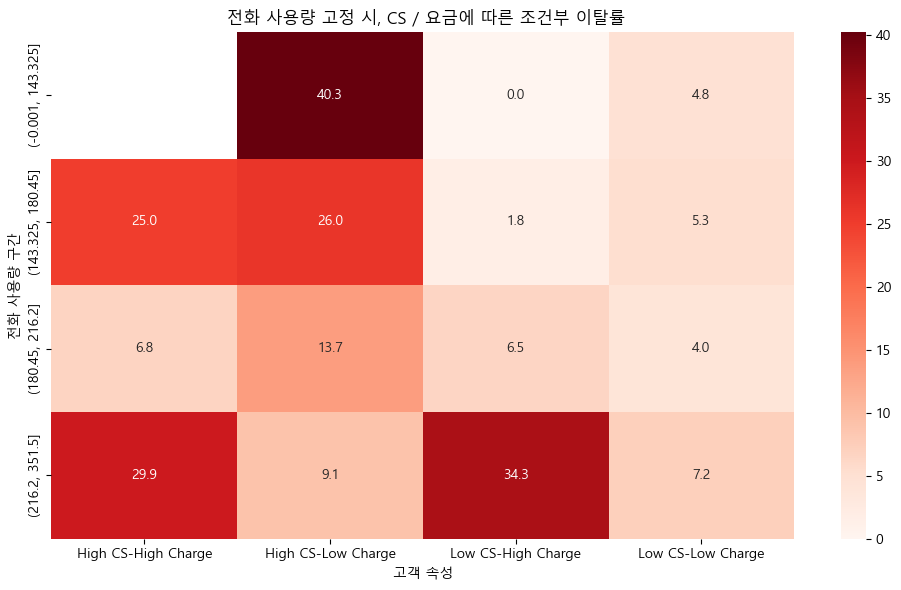

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. 데이터 로드
# -----------------------------
df = pd.read_csv("data/01_raw/train.csv")

# -----------------------------
# 2. 전처리
# -----------------------------
df['churn'] = df['churn'].map({'yes':1, 'no':0})

charge_cols = [
    'total_day_charge','total_eve_charge',
    'total_night_charge','total_intl_charge'
]
df['total_charge'] = df[charge_cols].sum(axis=1)

# 그룹화
df['usage_group'] = pd.qcut(df['total_day_minutes'], q=4)
df['cs_group'] = np.where(df['number_customer_service_calls'] >= 3, 'High CS', 'Low CS')
df['charge_group'] = np.where(
    df['total_charge'] >= df['total_charge'].quantile(0.7),
    'High Charge', 'Low Charge'
)

# -----------------------------
# 3. 조건부 이탈률 계산
# -----------------------------
pivot = (
    df.pivot_table(
        values='churn',
        index='usage_group',
        columns=['cs_group','charge_group'],
        aggfunc='mean'
    ) * 100
)

# -----------------------------
# 4. 시각화
# -----------------------------
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="Reds")
plt.title(" 전화 사용량 고정 시, CS / 요금에 따른 조건부 이탈률")
plt.xlabel("고객 속성")
plt.ylabel("전화 사용량 구간")
plt.tight_layout()
plt.show()


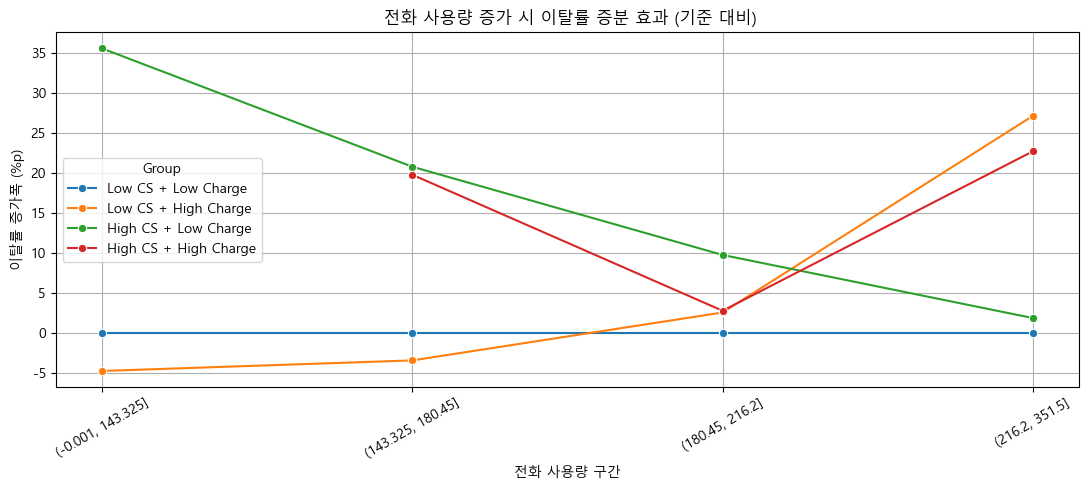

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. 데이터 로드
# -----------------------------
df = pd.read_csv("data/01_raw/train.csv")
df['churn'] = df['churn'].map({'yes':1, 'no':0})

# 요금 계산
charge_cols = [
    'total_day_charge','total_eve_charge',
    'total_night_charge','total_intl_charge'
]
df['total_charge'] = df[charge_cols].sum(axis=1)

# 그룹 정의
df['usage_group'] = pd.qcut(df['total_day_minutes'], q=4, duplicates='drop')
df['usage_group'] = df['usage_group'].astype(str)  # ⭐ 핵심 FIX

df['cs_group'] = np.where(
    df['number_customer_service_calls'] >= 3,
    'High CS','Low CS'
)

df['charge_group'] = np.where(
    df['total_charge'] >= df['total_charge'].quantile(0.7),
    'High Charge','Low Charge'
)

# -----------------------------
# 2. 기준 그룹 (Low CS + Low Charge)
# -----------------------------
base = (
    df[(df['cs_group']=='Low CS') & (df['charge_group']=='Low Charge')]
    .groupby('usage_group', as_index=False)['churn']
    .mean()
    .rename(columns={'churn':'base_churn'})
)

# -----------------------------
# 3. 비교 그룹 생성
# -----------------------------
effect_rows = []

for cs in ['Low CS','High CS']:
    for ch in ['Low Charge','High Charge']:
        temp = (
            df[(df['cs_group']==cs) & (df['charge_group']==ch)]
            .groupby('usage_group', as_index=False)['churn']
            .mean()
            .rename(columns={'churn':'group_churn'})
        )

        merged = temp.merge(base, on='usage_group', how='inner')
        merged['delta_churn'] = (merged['group_churn'] - merged['base_churn']) * 100
        merged['Group'] = f"{cs} + {ch}"

        effect_rows.append(merged)

effect_df = pd.concat(effect_rows, ignore_index=True)

# -----------------------------
# 4. 시각화
# -----------------------------
plt.figure(figsize=(11,5))

sns.lineplot(
    data=effect_df,
    x='usage_group',
    y='delta_churn',
    hue='Group',
    marker='o'
)

plt.title(" 전화 사용량 증가 시 이탈률 증분 효과 (기준 대비)")
plt.xlabel("전화 사용량 구간")
plt.ylabel("이탈률 증가폭 (%p)")
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()


7️⃣ 전략 시뮬레이터 효과 (Before vs After)

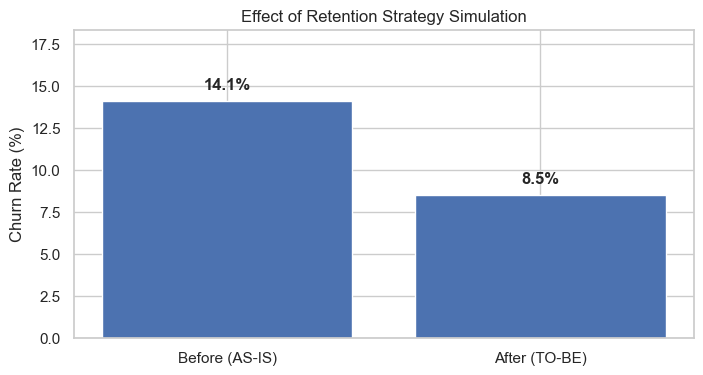

In [15]:
plot_simulation_effect(before_churn=14.1, after_churn=8.5)

8️⃣ 기대 효과: 연간 매출 회복

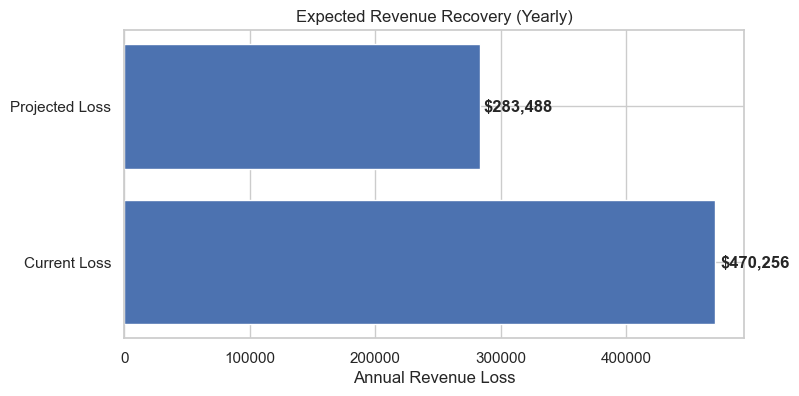

In [16]:
plot_expected_revenue_effect(
    current_loss=39188 * 12,
    projected_loss=39188 * 12 * (8.5 / 14.1)
)


9️⃣ 최종 결론 시각화 (Closing Slide)

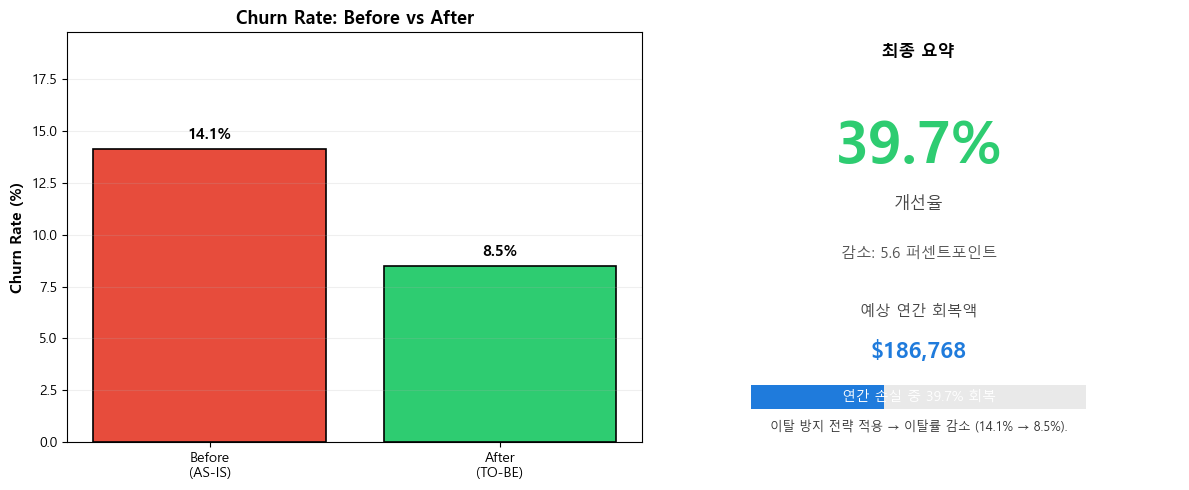

In [11]:
def plot_final_message(
    before_churn=14.1,
    after_churn=8.5,
    annual_recovery=0,
    currency_prefix='$',
    show_thousands=True
):
    """Compact final-slide summary (Korean right-side):
    - Left: Before vs After bars
    - Right: Big improvement %, reduction in points, and estimated annual recovery with progress bar (Korean)
    """
    import platform
    import matplotlib as mpl
    # Set OS-appropriate Korean font to avoid 깨짐 on Windows/mac/linux
    if platform.system() == 'Windows':
        mpl.rcParams['font.family'] = 'Malgun Gothic'
    elif platform.system() == 'Darwin':
        mpl.rcParams['font.family'] = 'AppleGothic'
    else:
        # common Linux Korean fonts
        mpl.rcParams['font.family'] = 'NanumGothic'
    mpl.rcParams['axes.unicode_minus'] = False

    from matplotlib import gridspec
    from matplotlib.patches import Rectangle

    improvement_rate = max(0.0, ((before_churn - after_churn) / before_churn) * 100)
    reduction_pts = before_churn - after_churn

    # format monetary value
    def fmt_money(x):
        if x is None:
            return ''
        if show_thousands:
            return f"{currency_prefix}{x:,.0f}"
        return f"{currency_prefix}{x:.0f}"

    # estimated recovered amount
    recovered_amt = annual_recovery * (improvement_rate / 100.0) if annual_recovery else 0

    fig = plt.figure(figsize=(12, 5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1.1, 1])

    # LEFT: clean bar chart
    ax0 = fig.add_subplot(gs[0])
    labels = ['Before\n(AS-IS)', 'After\n(TO-BE)']
    values = [before_churn, after_churn]
    colors = ['#e74c3c', '#2ecc71']

    bars = ax0.bar(labels, values, color=colors, edgecolor='black', linewidth=1.2)
    ax0.set_ylim(0, max(values) * 1.4)
    ax0.set_ylabel('Churn Rate (%)', fontsize=11, fontweight='bold')
    ax0.set_title('Churn Rate: Before vs After', fontsize=13, fontweight='bold')
    ax0.grid(axis='y', alpha=0.2)

    for bar, v in zip(bars, values):
        ax0.text(bar.get_x() + bar.get_width() / 2, v + 0.3, f'{v:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

    # RIGHT: summary block (Korean)
    ax1 = fig.add_subplot(gs[1])
    ax1.axis('off')

    # Big improvement percent
    ax1.text(0.5, 0.72, f'{improvement_rate:.1f}%', ha='center', va='center', fontsize=42, fontweight='bold', color='#2ecc71')
    ax1.text(0.5, 0.58, '개선율', ha='center', va='center', fontsize=12, color='#444')

    # reduction in points
    ax1.text(0.5, 0.46, f'감소: {reduction_pts:.1f} 퍼센트포인트', ha='center', va='center', fontsize=11, color='#555')

    # monetary recovery section
    if annual_recovery and annual_recovery != 0:
        ax1.text(0.5, 0.32, '예상 연간 회복액', ha='center', va='center', fontsize=11, color='#444')
        ax1.text(0.5, 0.22, fmt_money(recovered_amt), ha='center', va='center', fontsize=16, fontweight='bold', color='#1f7bdc')

        # horizontal progress bar
        bar_left = 0.18
        bar_width = 0.64
        bar_y = 0.08
        bar_h = 0.06
        pct = min(improvement_rate / 100.0, 1.0)

        # background
        ax1.add_patch(Rectangle((bar_left, bar_y), bar_width, bar_h, transform=ax1.transAxes, facecolor='#e9e9e9', edgecolor='none'))
        # filled
        ax1.add_patch(Rectangle((bar_left, bar_y), bar_width * pct, bar_h, transform=ax1.transAxes, facecolor='#1f7bdc', edgecolor='none'))
        ax1.text(0.5, bar_y + bar_h / 2, f'연간 손실 중 {improvement_rate:.1f}% 회복', ha='center', va='center', fontsize=10, color='#fff' if pct>0.15 else '#222', transform=ax1.transAxes)

    # small callout / takeaway line (Korean)
    takeaway = f"이탈 방지 전략 적용 → 이탈률 감소 ({before_churn:.1f}% → {after_churn:.1f}%)."
    ax1.text(0.5, 0.95, '최종 요약', ha='center', va='center', fontsize=12, fontweight='bold', transform=ax1.transAxes)
    ax1.text(0.5, 0.02, takeaway, ha='center', va='bottom', fontsize=9, color='#333', transform=ax1.transAxes)

    plt.tight_layout()
    plt.show()


# Example preview with estimated annual loss (use your company's value if available)
plot_final_message(before_churn=14.1, after_churn=8.5, annual_recovery=39188 * 12)
